In [49]:
import scipy as sp
import sympy
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# RC Circuit analysis

A first order electrical system where the input and the output can be choosen as:

__INPUT__

+ voltage source
+ current source


__OUTPUT__

+ voltage or current in the:
    + resistor
    + capacitor
    
    
In the following example the input is a voltage source and the output is the current through the circuit.

## Analysis

$$
v(t) = v_r(t) + v_c(t) 
$$

Using the kirchoff voltage law:

$$
v_r(t) + v_c(t) = v(t)
$$

The total response of the system can is the sum of:
+ Free source (zero input) response
+ Zero state (null initial conditions)


### Zero input

$$
Ri(t) + v_c(t) = 0
$$

The current in the circuit is the same for the resistor and the capacitor:

$$
RCv_c'(t) + v_c(t) = 0
$$

Normalizing and reordering we got the 1st order differential equation that models the RC circuit

$$
v_c'(t) + \frac{1}{RC}v(t) = 0
$$

It's solved using the characteristic equation:

$$
s + \frac{1}{RC} = 0
$$

Solving for s

$$
s = -\frac{1}{RC}
$$


The solution of the differential equation for the current:

$$
v_c(t) = exp(-\frac{t}{RC})
$$

The time constant is $ \tau = RC $

### Zero state (forced response)

The zero state response is different for the type of input applied, it can be:

+ constant source 
+ sinusoidal
+ exponential
+ square wave
+ etc...

For this circuit, a unit step function is used as the input voltage:


$$
u(t) = 
$$


$$
v_c'(t) + \frac{1}{RC}v_c(t) = u(t)
$$

For $t\ge 0$

$$
v_c'(t) + \frac{1}{RC}v_c(t) = \frac{V}{RC}
$$

To solve this diferential equation we use the _indeterminated coeffiecients_ method, where we assume the response it's a constant function. Also, the total
response of the circuit is:

$$
v_c(t) = v_h(t) + v_p(t)
$$

Where $v_h(t)$ it's the homogenous solution (__zero input__) that we've already found and $v_p(t)$ is the __particular solution__ (zero state).

* Solution: the input is constant, we make a guess about the form of $v_c = A$

Substitute the value of $v_c$ into the differential equation:

$$
A' + \frac{1}{RC}A = \frac{V}{RC}
$$

The derivative of a constant it's zero and solving for A:

$$
v_p(t) = A = V
$$

The total response of the circuit is:

$$
v_c(t) = Ce^(\frac{-t}{RC}) + V
$$

One last step, we should find the constant $C$ we use the initial conditions $v_c(t=0)=0$:

$$
v_c(t=0) = C + V = 0
$$

$$
C = -V
$$

The voltage across the capacitor can be modeled with:

$$
v_c(t) = V - Ve^(\frac{-t}{RC})
$$

## Numerical computing

In [83]:
R = 100
C = 1e-3
V = 5

tau = R*C

t = np.linspace(0, 2, 100)

v_ct_zeroinput = np.exp(-t/(R*C))

v_ct_zerostate = V*(1 - np.exp(-t/(R*C)))

def voltage_c(V, t):
    return V*(1-np.exp(-t/(R*C)))

Text(0.5, 4.966310265004573, '$5\\tau$')

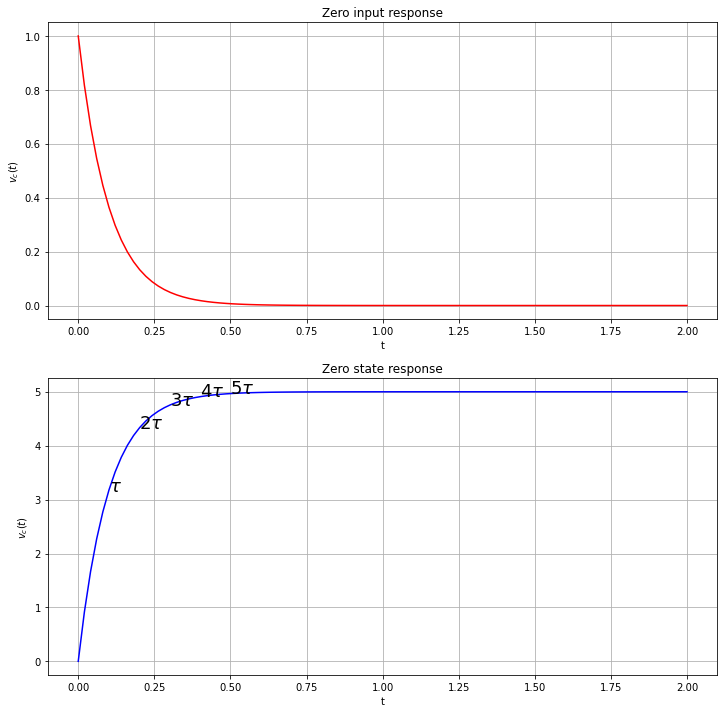

In [88]:
fig, axs = plt.subplots(2, figsize=(12,12))

axs[0].plot(t, v_ct_zeroinput, "r")
axs[0].grid()
axs[0].set_title("Zero input response")
axs[0].set_xlabel("t")
axs[0].set_ylabel(r"$v_c(t)$")
axs[1].plot(t, v_ct_zerostate, "b")
axs[1].grid()
axs[1].set_title("Zero state response")
axs[1].set_xlabel("t")
axs[1].set_ylabel(r"$v_c(t)$")
axs[1].text(tau, voltage_c(V, tau), r"$\tau$", fontsize=18)
axs[1].text(2*tau, voltage_c(V, 2*tau), r"$2\tau$", fontsize=18)
axs[1].text(3*tau, voltage_c(V, 3*tau), r"$3\tau$", fontsize=18)
axs[1].text(4*tau, voltage_c(V, 4*tau), r"$4\tau$", fontsize=18)
axs[1].text(5*tau, voltage_c(V, 5*tau), r"$5\tau$", fontsize=18)